# **INTERMEDIATE TASKS**

**Task 1**

---



 Create a pivot table

In [15]:
import pandas as pd
df_cleaned = pd.read_csv("Global YouTube Statistics.csv" , delimiter = '\t' , encoding = "latin-1")

df_cleaned = pd.read_csv("Global YouTube Statistics.csv" , nrows=100, encoding = "latin-1")

In [16]:
# Pivot Table: Total Subscribers per Country
pivot_table = df_cleaned.pivot_table(values="subscribers", index="Country", aggfunc="sum")

# Display result
pivot_table.sort_values(by="subscribers", ascending=False).head(10)

,subscribers
Country,
United States,1943600000
India,1654600000
Brazil,276500000
South Korea,236700000
Russia,196700000
United Kingdom,133600000
Thailand,120200000
Japan,111000000
Canada,110800000


**Task 2**

---

Convert Date Column to Datetime Format

In [17]:
df_cleaned["created_date"] = pd.to_datetime(df_cleaned["created_date"])

 Sort Data by Date

In [18]:
df_cleaned.sort_values(by="created_date")

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
58,59,Katy Perry,44200000,2.545895e+10,Music,Katy Perry,128,United States,US,Music,...,100000.0,2008,Jun,1970-01-01 00:00:00.000000001,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006,Sep,1970-01-01 00:00:00.000000001,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
95,96,ABP NEWS,37000000,1.310261e+10,People & Blogs,ABP NEWS,301308,India,IN,News,...,400000.0,2012,Jun,1970-01-01 00:00:00.000000001,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
47,48,Shemaroo,47400000,2.251971e+10,Entertainment,Shemaroo,11451,India,IN,Entertainment,...,500000.0,2007,Sep,1970-01-01 00:00:00.000000001,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
55,56,Vocï¿½ï¿½ï¿½,44700000,7.828611e+09,Entertainment,Vocï¿½ï¿½ï¿½,1558,Brazil,BR,Entertainment,...,100000.0,2013,Sep,1970-01-01 00:00:00.000000001,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,33,Wave Music,58000000,4.060202e+10,Music,Wave Music,19487,India,IN,Music,...,500000.0,2014,Oct,1970-01-01 00:00:00.000000029,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010,Apr,1970-01-01 00:00:00.000000029,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
78,79,CarryMinati,39200000,3.294013e+09,Comedy,CarryMinati,186,India,IN,Comedy,...,700000.0,2014,Oct,1970-01-01 00:00:00.000000030,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
18,19,Sports,75000000,0.000000e+00,NaN,sports,3,United States,US,Entertainment,...,NaN,2006,Jan,1970-01-01 00:00:00.000000030,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


 Create a line chart to visualize trends over time.

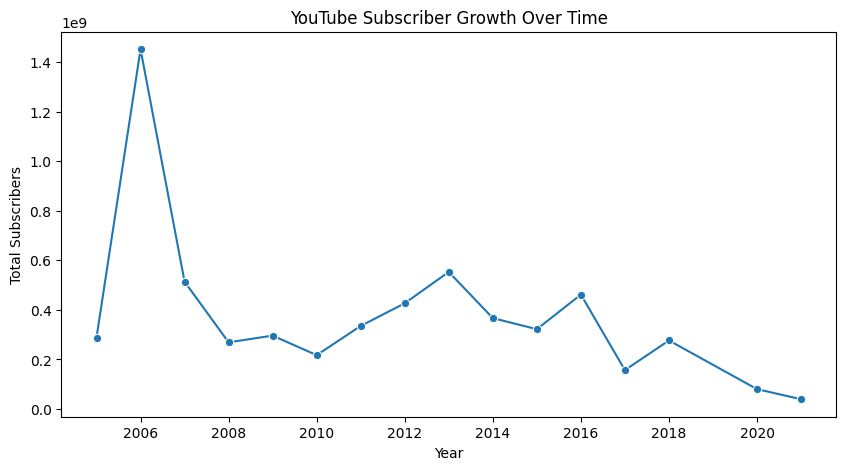

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

df_trend = df_cleaned.groupby("created_year")["subscribers"].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10,5))
sns.lineplot(x="created_year", y="subscribers", data=df_trend, marker="o")

plt.title("YouTube Subscriber Growth Over Time")
plt.xlabel("Year")
plt.ylabel("Total Subscribers")
plt.show()

**Task 3**

---
Load SQLite & Create a Database



In [20]:
import sqlite3

# Connect to a database (or create one)
conn = sqlite3.connect("youtube_data.db")
df_cleaned.to_sql("youtube", conn, if_exists="replace", index=False)

100

Select Top 10 YouTubers with Highest Subscribers

In [21]:
query = """
SELECT Youtuber, Subscribers, Country
FROM youtube
ORDER BY Subscribers DESC
LIMIT 10;
"""
pd.read_sql(query, conn)

,Youtuber,subscribers,Country
0,T-Series,245000000,India
1,YouTube Movies,170000000,United States
2,MrBeast,166000000,United States
3,Cocomelon - Nursery Rhymes,162000000,United States
4,SET India,159000000,India
5,Music,119000000,None
6,ýýý Kids Diana Show,112000000,United States
7,PewDiePie,111000000,Japan
8,Like Nastya,106000000,Russia
9,Vlad and Niki,98900000,United States


Find Total Subscribers by Country

In [22]:
query = """
SELECT Country, SUM(Subscribers) AS Total_Subscribers
FROM youtube
GROUP BY Country
ORDER BY Total_Subscribers DESC;
"""
pd.read_sql(query, conn)

,Country,Total_Subscribers
0,United States,1943600000
1,India,1654600000
2,None,654600000
3,Brazil,276500000
4,South Korea,236700000
5,Russia,196700000
6,United Kingdom,133600000
7,Thailand,120200000
8,Japan,111000000
9,Canada,110800000


Close the SQL Connection

In [23]:
conn.close()

In [24]:
from google.colab import files
df_cleaned.to_csv('df_cleaned.csv', index=False)
files.download("df_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>